In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import xarray as xr
import ghibtools as gh
from params import *

In [3]:
save = False

In [4]:
da = xr.load_dataarray(f'../dataarray/da_tf_all_means.nc')

In [5]:
da

<xarray.DataArray (patient: 10, cycle_type: 4, freqs: 40, point: 1000)>
array([[[[ 2.37006009e-01,  2.36621156e-01,  2.36236289e-01, ...,
           2.37797469e-01,  2.37539649e-01,  2.37269595e-01],
         [ 1.93936363e-01,  1.93439364e-01,  1.92937866e-01, ...,
           1.94906890e-01,  1.94588363e-01,  1.94256753e-01],
         [ 1.59938693e-01,  1.59410179e-01,  1.58875346e-01, ...,
           1.60913944e-01,  1.60594955e-01,  1.60262227e-01],
         ...,
         [-3.05449218e-01, -3.05457383e-01, -3.05468351e-01, ...,
          -3.05363685e-01, -3.05392951e-01, -3.05422843e-01],
         [-3.06734413e-01, -3.06739599e-01, -3.06747466e-01, ...,
          -3.06656539e-01, -3.06678653e-01, -3.06704044e-01],
         [-3.08001906e-01, -3.07998955e-01, -3.08000386e-01, ...,
          -3.07944924e-01, -3.07956904e-01, -3.07970524e-01]],

        [[ 1.95451841e-01,  1.93900973e-01,  1.92268848e-01, ...,
           2.32378721e-01,  2.32225522e-01,  2.32059896e-01],
         [ 1.49495766e-01,  1.47864625e-01,  1.46180212e-01, ...,
           1.99232429e-01,  1.98894948e-01,  1.98536307e-01],
         [ 1.12599716e-01,  1.11011520e-01,  1.09393470e-01, ...,
           1.70791566e-01,  1.70288190e-01,  1.69757783e-01],
...
          -2.83662915e-01, -2.83822775e-01, -2.84038097e-01],
         [-2.87667125e-01, -2.88090587e-01, -2.88565993e-01, ...,
          -2.90244609e-01, -2.90485173e-01, -2.90729433e-01],
         [-2.96743482e-01, -2.97207683e-01, -2.97730982e-01, ...,
          -2.97985733e-01, -2.98298717e-01, -2.98564166e-01]],

        [[-1.32272035e-01, -1.30604833e-01, -1.28947139e-01, ...,
           6.13000840e-02,  7.24737495e-02,  5.90133518e-02],
         [-1.19299874e-01, -1.17620513e-01, -1.15972072e-01, ...,
           9.20589268e-02,  1.02552459e-01,  8.99582952e-02],
         [-1.02720708e-01, -1.00921020e-01, -9.91503894e-02, ...,
           1.19107440e-01,  1.29360795e-01,  1.17166013e-01],
         ...,
         [-6.57677948e-02, -6.53841496e-02, -6.49530888e-02, ...,
          -5.84215224e-02, -5.45240343e-02, -5.81904352e-02],
         [-5.99246621e-02, -5.95147610e-02, -5.90492785e-02, ...,
          -5.46964705e-02, -5.07060289e-02, -5.43381274e-02],
         [-5.23049831e-02, -5.18664420e-02, -5.13677597e-02, ...,
          -4.98891175e-02, -4.58882451e-02, -4.94345427e-02]]]],
      dtype=float32)
Coordinates:
    spindling      <U8 'spindled'
    normalisation  <U6 'normal'
  * freqs          (freqs) float64 10.0 10.26 10.51 10.77 ... 19.49 19.74 20.0
  * point          (point) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * cycle_type     (cycle_type) object 'all' 'spindled' 'unspindled' 'diff'
  * patient        (patient) object 'P1' 'P2' 'P3' 'P4' ... 'P7' 'P8' 'P9' 'P10'

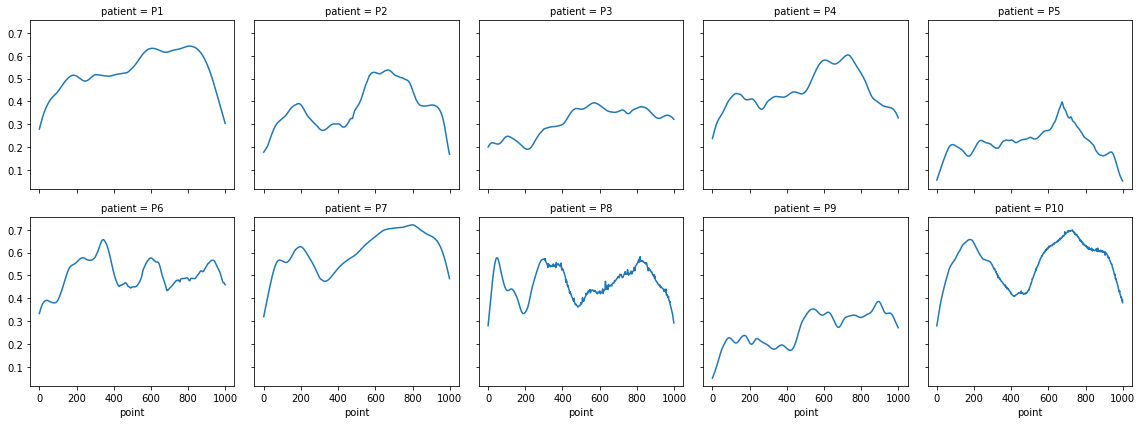

In [9]:
da.loc[:,'diff',11:15,:].mean('freqs').plot.line(x='point', col = 'patient', col_wrap = 5)

In [13]:
test = da.loc[:,'diff',11:15,:].mean(['patient','freqs']).values

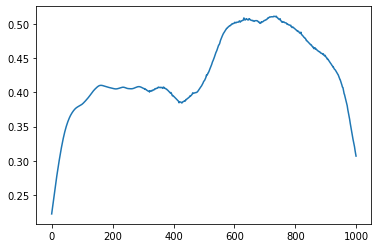

In [38]:
plt.plot(test)

In [15]:
test.shape 

(1000,)

In [94]:
bin_values = []
n_bins = 18
slicers = np.linspace(20,1000, n_bins)
for i, slicer in enumerate(slicers):
    if i != 0:
        bin_values.append(np.mean(test[int(slicers[i-1]):int(slicer)]))
    else:
        bin_values.append(np.mean(test[:int(slicer)]))
bin_values = bin_values / sum(bin_values)

<BarContainer object of 18 artists>

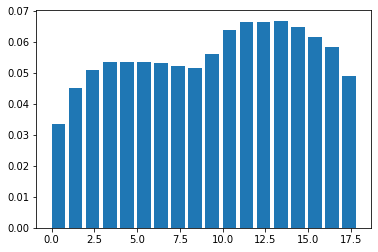

In [95]:
plt.bar(x=np.arange(0,n_bins,1), height=bin_values, align = 'edge')

In [84]:
slicers

array([  20.        ,   77.64705882,  135.29411765,  192.94117647,
        250.58823529,  308.23529412,  365.88235294,  423.52941176,
        481.17647059,  538.82352941,  596.47058824,  654.11764706,
        711.76470588,  769.41176471,  827.05882353,  884.70588235,
        942.35294118, 1000.        ])

In [101]:
def get_mi_of_sigma(sig):
    bin_values = []
    n_bins = 18
    slicers = np.linspace(20,1000, n_bins)
    for i, slicer in enumerate(slicers):
        if i != 0:
            bin_values.append(np.mean(sig[int(slicers[i-1]):int(slicer)]))
        else:
            bin_values.append(np.mean(sig[:int(slicer)]))
    bin_values = bin_values / sum(bin_values)
    return gh.Modulation_Index(bin_values, show = True)


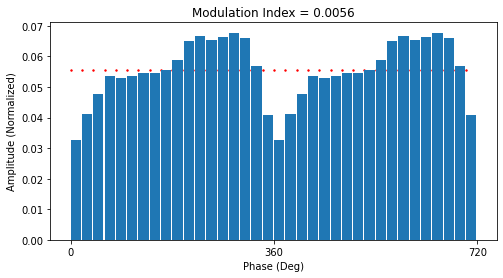

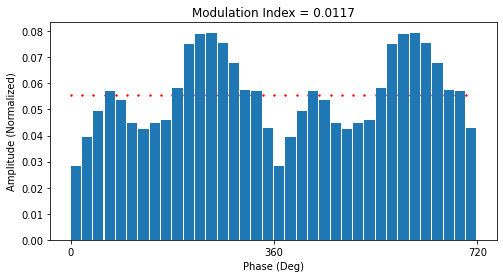

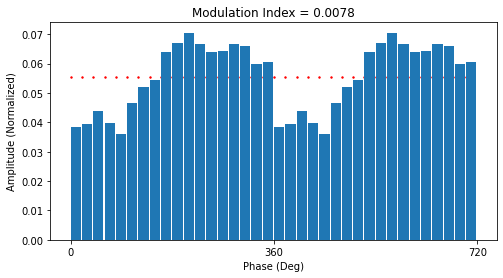

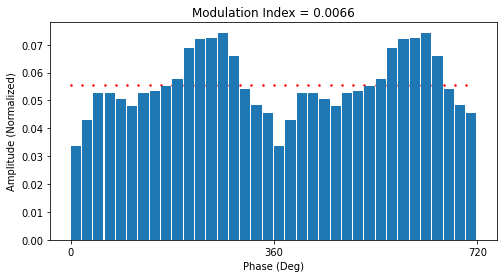

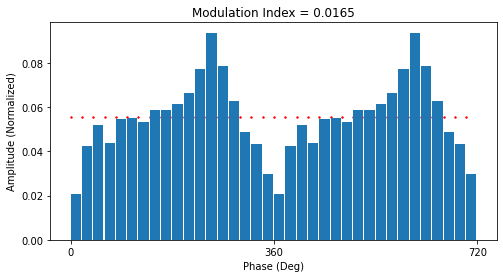

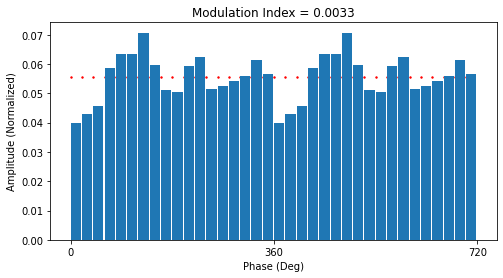

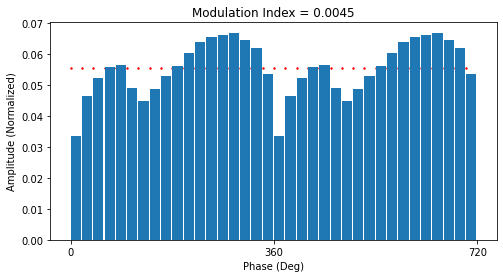

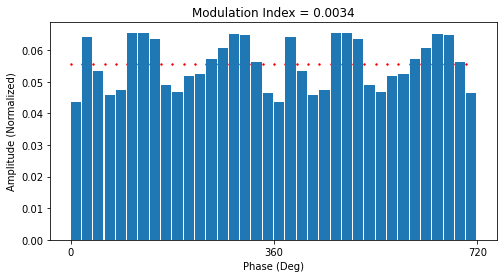

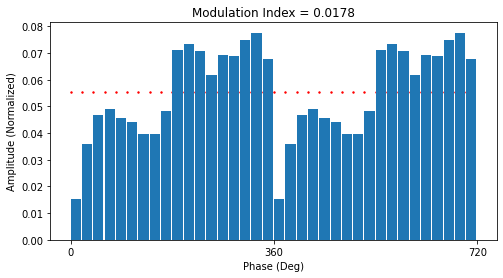

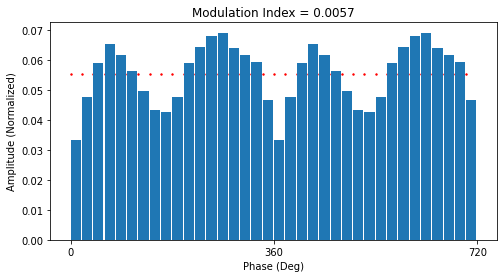

In [105]:
for patient in patients:
    sig = da.loc[patient,'diff',11:15,:].mean('freqs').values
    get_mi_of_sigma(sig)